This is a (mostly) empty template that can be used for a little bit of a self check of the CH 1-4 stuff, or the basic examination of one varaible.

This is useful becuase there's very little guidance, so you'll need to figure out what to do on your own. Looking forward, one of the primary reasons that we need to know this stuff for machine learning is something called Exploratory Data Analysis (EDA), which is usually the first step in doing machine learning stuff. We take whatever data we're using, load it up, and look through it to see if anything is wrong, weird, useful, or interersting. This helps us prepare our data for the ML work, to make things as accurate and reliable as possible. This little bit is kind of part 1 of EDA that you'll need to do later on.

The first dataset is pretty simple. The second is slightly more complex. 

Here's a few potentially useful things that you don't need to memorize:
Get rid of any non-numbers: newDataFrame = oldDF[~np.isnan(oldDF)]
Apply a function to everything in a dataframe (one with one column!):
 (e.g. mult by 2.54): dataFrame.apply(lambda x: x*2.54)
 (e.g. )

In [1]:
#Import Stuff

import thinkstats2
import thinkplot
import pandas as pd
import numpy as np

In [2]:
#Load the data
#filename is 'HeightWeight.csv"
#Look at the weight.
df = pd.read_csv("fifa_eda.csv")
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [4]:
#Do basic exploration - range, min, max, std, mean...
#Ask yourself, does this match your understanding of reality?

df.describe(include="all")

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
count,18207.000000,18207,18207.000000,18207,18207.000000,18207.000000,17966,17955.000000,18207.000000,18207,18159.000000,18159.000000,18207,18207.000000,17918,18207.000000,18207.000000,18207.000000
unique,NaN,17194,NaN,164,NaN,NaN,651,NaN,NaN,2,NaN,NaN,27,NaN,35,NaN,NaN,NaN
top,NaN,J. Rodríguez,NaN,England,NaN,NaN,Liverpool,NaN,NaN,Right,NaN,NaN,ST,NaN,2019-01-01,NaN,NaN,NaN
freq,NaN,11,NaN,1662,NaN,NaN,33,NaN,NaN,13996,NaN,NaN,2154,NaN,4870,NaN,NaN,NaN
mean,214298.338606,NaN,25.122206,NaN,66.238699,71.307299,NaN,2444.530214,9.731312,NaN,1.113222,2.361308,NaN,2016.420607,NaN,5.946771,165.979129,4585.060971
std,29965.244204,NaN,4.669943,NaN,6.908930,6.136496,NaN,5626.715434,21.999290,NaN,0.394031,0.756164,NaN,2.018194,NaN,0.220514,15.572775,10630.414430
min,16.000000,NaN,16.000000,NaN,46.000000,48.000000,NaN,10.000000,0.000000,NaN,1.000000,1.000000,NaN,1991.000000,NaN,5.083333,110.000000,13.000000
25%,200315.500000,NaN,21.000000,NaN,62.000000,67.000000,NaN,325.000000,1.000000,NaN,1.000000,2.000000,NaN,2016.000000,NaN,5.750000,154.000000,570.000000
50%,221759.000000,NaN,25.000000,NaN,66.000000,71.000000,NaN,700.000000,3.000000,NaN,1.000000,2.000000,NaN,2017.000000,NaN,5.916667,165.000000,1300.000000
75%,236529.500000,NaN,28.000000,NaN,71.000000,75.000000,NaN,2100.000000,9.000000,NaN,1.000000,3.000000,NaN,2018.000000,NaN,6.083333,176.000000,4585.060806


In [5]:
#Remove 0s
df = df[df["Wage"]>0]

In [9]:
#Sort the data

df = df.sort_values(by=["Wage"], ascending=False)

# Get just one outlier
# df[df["Wage"]==565]

df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000.0,455.0,Right,5.0,3.0,RS,2014,2021-01-01,6.000000,190.0,164000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000.0,420.0,Right,4.0,4.0,RCM,2012,2020-01-01,5.666667,146.0,137400.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000.0,380.0,Right,4.0,3.0,RCB,2005,2020-01-01,6.000000,181.0,104600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8890,229658,C. Dajome,24,Colombia,66,71,América de Cali,850.0,1.0,Right,1.0,3.0,LS,2018,2023-01-01,5.666667,152.0,1200.0
574,225997,B. Verbič,24,Slovenia,79,81,Dynamo Kyiv,15500.0,1.0,Right,1.0,4.0,LM,2018,2023-01-01,5.833333,154.0,33700.0
15114,233916,L. Chiappero,24,Argentina,60,67,Defensa y Justicia,210.0,1.0,Left,1.0,1.0,GK,2016,2021-01-01,6.166667,165.0,357.0
15237,226792,M. Jadama,24,United States,60,69,Portland Timbers,280.0,1.0,Right,1.0,2.0,CB,2018,2019-01-01,6.083333,176.0,476.0


In [14]:
#Graph it, can you make a histogram, PMF, CDF?
#When you look at it, does it make sense?

wages = pd.Series(df["Wage"])
#wages.head()
# Could also just use this df["Wage"]

hist = thinkstats2.Hist(round(wages),-1)
pmf = thinkstats2.Pmf(round(wages),-1)
cdf = thinkstats2.Cdf(wages)

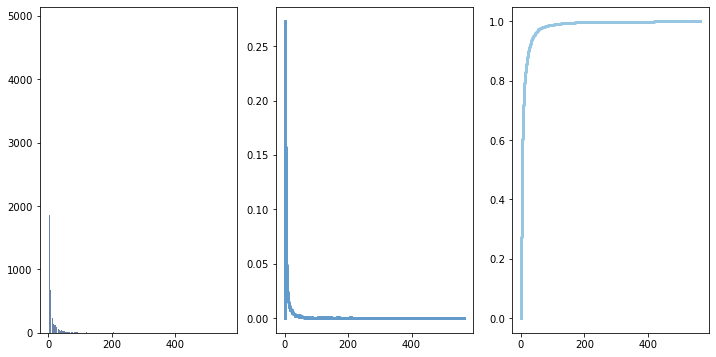

In [16]:
#Plot objects from last cell

thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(hist)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf)
thinkplot.Config()

{'xscale': 'linear', 'yscale': 'linear'}

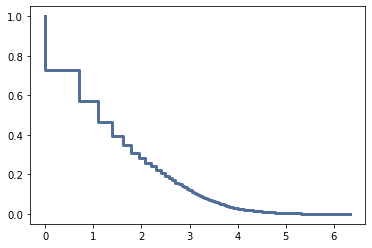

In [19]:
#Pareto Visual Check

logWage = np.log(wages)
logCDF = thinkstats2.Cdf(logWage)

thinkplot.Cdf(logCDF, scaley="log", complement=True)

In [20]:
cdf.Prob(20)
#We know that nearly 90% of our players are below 20M

0.8807747968384727

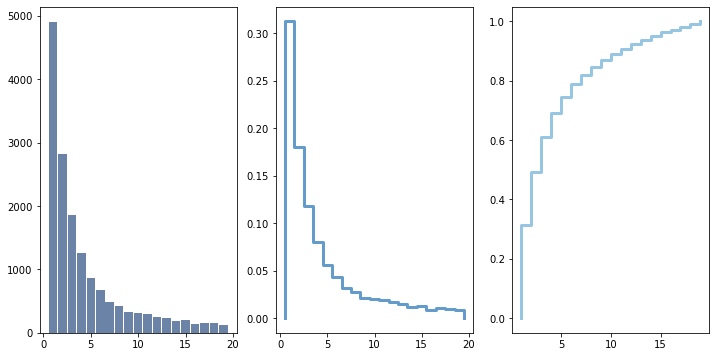

In [22]:
#This is how to set up graphs WITHOUT making them into a series. you must specify the column.
lowWage = df[df["Wage"]<20]
lowHist = thinkstats2.Hist(lowWage["Wage"])
lowPmf = thinkstats2.Pmf(lowWage["Wage"])
lowCdf = thinkstats2.Cdf(lowWage["Wage"])

thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(lowHist)
thinkplot.SubPlot(2)
thinkplot.Pmf(lowPmf)
thinkplot.SubPlot(3)
thinkplot.Cdf(lowCdf)
thinkplot.Config()

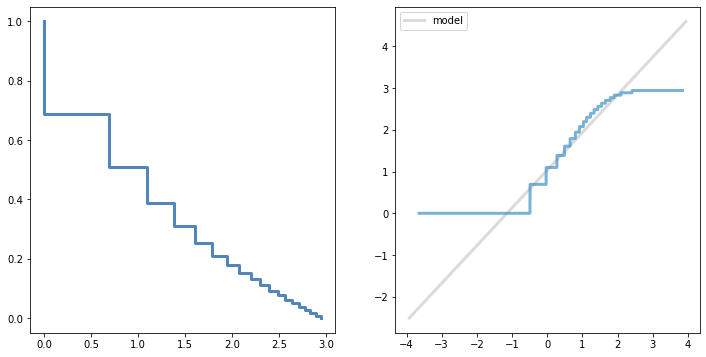

In [26]:
#Visual Checks

logLowWage = np.log(lowWage["Wage"])
logLowCDF = thinkstats2.Cdf(logLowWage)
thinkplot.PrePlot(2,cols=2)
thinkplot.Cdf(logLowCDF, scaley="log",complement=True)
thinkplot.SubPlot(2)
thinkstats2.NormalProbabilityPlot(logLowWage)
thinkplot.Config()

The wages fit the model but in the medium of the distribution you are close. 

In [ ]:
#Split the data. Do the stats and graphs for each gender.
#Again, does it make sense? Match your understanding of reality?

In [ ]:
#In your exploration, did anythign stand out? Are there weird patterns? Outliers? Things that
#don't make sense? Errors? Incorrect values?
#(This dataset is pretty simple, so if you don't see anything crazy, that's normal)

Repeat the basic process with this more complex data. For this, you might need to do more investigation/examination - particulary with things like errors, outliers, etc....

This is kind of realistic - here's some data, is there anything we need to 'worry' about in using it? Does anything jump out as potentially interesting? Or possibly indicitive of something? 

If you consider WAGE as the varaible you care about - look for dasic descriptions, patterns, outliers or errors. Do things like POSITION or NATIONALITY indicate any differences in the WAGE?

In [ ]:
#Filename is "fifa_eda.csv"